# Prática 7

Aprendizado Dinâmico

por Cibele Russo (ICMC/USP - São Carlos SP)

MBA em Ciências de Dados



Nesta prática vamos considerar redes dinâmicas para modelar a temperatura global dos dados em globaltemp.

**1.Faça a leitura das bibliotecas.**

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

**2. Leia os dados do arquivo globaltemp.csv.**

<AxesSubplot:xlabel='year'>

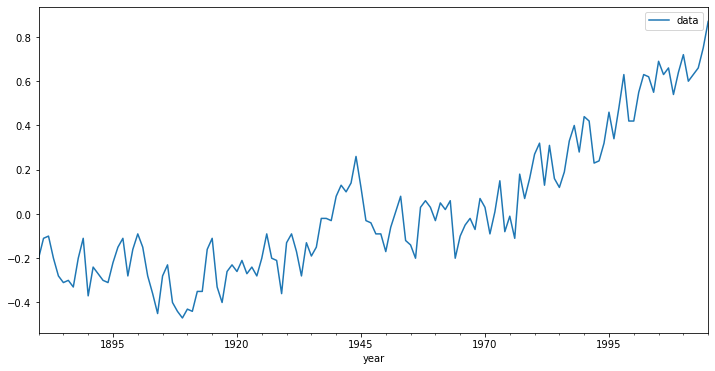

In [3]:
# Temperatura global

# Diferenças na média de temperatura global. 
# Fonte: https://github.com/mjuez/pytsdatasets/

pkgdir = '/hdd/MBA/AprendizadoDinamico/Data'


df = pd.read_csv('globaltemp.csv', index_col=0,
                         parse_dates=True)
df.index = df.index
df.plot(figsize=(12,6))


In [4]:
df.head()

data
year            
1880-01-01 -0.20
1881-01-01 -0.11
1882-01-01 -0.10
1883-01-01 -0.20
1884-01-01 -0.28

##

**3.  Divida a base em treino e teste, deixando 14 dias para a previsão.**

136

122

In [8]:
train

data
year            
1880-01-01 -0.20
1881-01-01 -0.11
1882-01-01 -0.10
1883-01-01 -0.20
1884-01-01 -0.28
...          ...
1997-01-01  0.48
1998-01-01  0.63
1999-01-01  0.42
2000-01-01  0.42
2001-01-01  0.55

[122 rows x 1 columns]

**4. Padronize os dados para a modelagem.**

In [9]:
from sklearn.preprocessing import MinMaxScaler

MinMaxScaler()

**5. Considere o gerador de séries temporais, com variados valores para os parâmetros length e batch_size.**


In [14]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [16]:
len(scaled_train)

122

In [17]:
len(generator) # n_input = 2

120

In [18]:
# Qual é a aparência do primeiro lote?


Dado o array: 
[0.24545455 0.32727273]
Previsão: 
 [[0.33636364]]


**6. Carregue as bibliotecas do keras para as redes dinâmicas.**

In [21]:
### Pacote ideal do tensorflow = 2.5
### Pacote ideal do keras = 2.6
### Caso necessário, instale o pacote nessas versões

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

**7. Defina os lotes pra o processo iterativo.**

In [22]:
# Vamos redefinir lotes de tamanho 21 para o procedimento iterativo
# Veja mais informações sobre o tamanho do lote http://deeplearningbook.com.br/o-efeito-do-batch-size-no-treinamento-de-redes-neurais-artificiais/


**8. Defina o modelo. Ele pode ter uma camada LSTM e uma camada Dense. Teste alternativas.**

In [23]:
# Defina o modelo


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


**9. Faça o ajuste do modelo e observe a função de perda.**

In [25]:
# Ajuste do modelo


C:\Users\leona\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
115/115 [==============================] - 1s 2ms/step - loss: 0.0267
Epoch 2/100
115/115 [==============================] - 0s 2ms/step - loss: 0.0127
Epoch 3/100
115/115 [==============================] - 0s 2ms/step - loss: 0.0115
Epoch 4/100
115/115 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 5/100
115/115 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 6/100
115/115 [==============================] - 0s 2ms/step - loss: 0.0121
Epoch 7/100
115/115 [==============================] - 0s 2ms/step - loss: 0.0113
Epoch 8/100
115/115 [==============================] - 0s 2ms/step - loss: 0.0106
Epoch 9/100
115/115 [==============================] - 0s 2ms/step - loss: 0.0126
Epoch 10/100
115/115 [==============================] - 0s 2ms/step - loss: 0.0126
Epoch 11/100
115/115 [==============================] - 0s 2ms/step - loss: 0.0113
Epoch 12/100
115/115 [==============================] - 0s 2ms/step - loss: 0.0109
Epoch 13/100


dict_keys(['loss'])

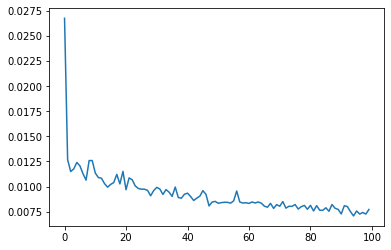

**10. Faça a previsão.**

array([[0.84545455],
       [0.73636364],
       [0.86363636],
       [1.        ],
       [0.80909091],
       [0.80909091],
       [0.92727273]])

In [30]:
# Agora vamos considerar as previsões para as próximas 21 observações e comparar com a base de teste


[array([0.9323747], dtype=float32),
 array([0.85277355], dtype=float32),
 array([0.93172765], dtype=float32),
 array([1.0880016], dtype=float32),
 array([0.97020197], dtype=float32),
 array([0.9451967], dtype=float32),
 array([1.0444181], dtype=float32),
 array([1.0814062], dtype=float32),
 array([1.0293252], dtype=float32),
 array([1.092088], dtype=float32),
 array([1.2667899], dtype=float32),
 array([1.2145313], dtype=float32),
 array([1.1857203], dtype=float32),
 array([1.284625], dtype=float32)]

In [32]:
scaled_test

array([[1.        ],
       [0.99090909],
       [0.92727273],
       [1.05454545],
       [1.        ],
       [1.02727273],
       [0.91818182],
       [1.00909091],
       [1.08181818],
       [0.97272727],
       [1.        ],
       [1.02727273],
       [1.10909091],
       [1.21818182]])

**11. Retorne da padronização.**

In [34]:
true_predictions

array([[0.55561219],
       [0.4680509 ],
       [0.55490041],
       [0.72680177],
       [0.59722217],
       [0.56971636],
       [0.67885991],
       [0.71954686],
       [0.66225777],
       [0.73129678],
       [0.9234689 ],
       [0.86598443],
       [0.83429236],
       [0.94308756]])

In [35]:
# Possivelmente encontraremos warnings aqui


<ipython-input-35-b5be589fc0d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


**12. Visualize os resultados, comparando as previsões com a base de teste.**

<AxesSubplot:xlabel='year'>

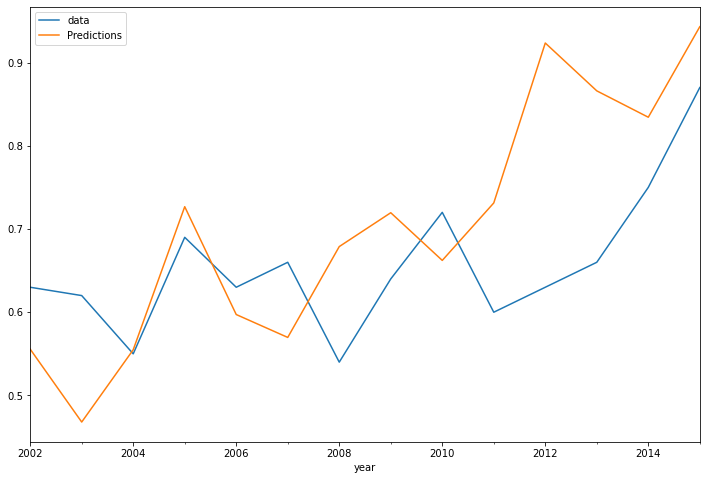